# Electric Vehicle Sales by State in India

## Importing Libraries

In [143]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 5.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 5.3 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.3 MB 5.1 MB/s eta 0:00:02
   ------------ --------------------------- 4.2/13.3 MB 5.0 MB/s eta 0:00:02
   --------------- ------------------------ 5.2/13.3 MB 5.1 MB/s eta 0:00:02
   ------------------ --------------------- 6.3/13.3 MB 5.1 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.3 MB 5.1 MB/s eta 0:00:02
   ------------------------- -------------- 8.7/13.3 MB 5.2 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/13.3 MB 5.2 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.3 MB 5.2 MB/s eta 0:00:01
   ----------------------------------- ---- 11.8/13.3 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 5.2 MB/s eta 0:00:01
   

In [137]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Loading the datasets 

In [138]:
df = pd.read_csv("C:/Users/aksha/OneDrive/Documents/Electric Vehicle Sales by State in India.csv")
print(df)

         Year Month_Name       Date                     State  \
0      2014.0        jan   1/1/2014            Andhra Pradesh   
1      2014.0        jan   1/1/2014            Andhra Pradesh   
2      2014.0        jan   1/1/2014            Andhra Pradesh   
3      2014.0        jan   1/1/2014            Andhra Pradesh   
4      2014.0        jan   1/1/2014            Andhra Pradesh   
...       ...        ...        ...                       ...   
96840  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96841  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96842  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96843  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96844  2023.0        dec  12/1/2023  Andaman & Nicobar Island   

                           Vehicle_Class Vehicle_Category Vehicle_Type  \
0                        ADAPTED VEHICLE           Others       Others   
1                   AGRICULTURAL TRACTOR           Others       Others 

# Data Processing

In [88]:
df.shape

(96845, 8)

In [139]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [90]:
# Getting summary statistics
print(df.describe())

               Year  EV_Sales_Quantity
count  96845.000000       96845.000000
mean    2018.622768          37.108896
std        2.895581         431.566675
min     2014.000000           0.000000
25%     2016.000000           0.000000
50%     2019.000000           0.000000
75%     2021.000000           0.000000
max     2024.000000       20584.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [92]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [93]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [94]:
df.Year.value_counts()

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
2024.0      860
Name: count, dtype: int64

In [95]:
df.State.value_counts()

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [96]:
df.Vehicle_Class.value_counts()

Vehicle_Class
MOTOR CAR                           4111
M-CYCLE/SCOOTER                     4101
GOODS CARRIER                       4096
MOTOR CAB                           3985
BUS                                 3813
                                    ... 
SEMI-TRAILER (COMMERCIAL)             18
X-RAY VAN                             12
MOTOR CYCLE/SCOOTER-WITH TRAILER       9
MODULAR HYDRAULIC TRAILER              3
MOTOR CARAVAN                          3
Name: count, Length: 73, dtype: int64

In [97]:
df.Vehicle_Category.value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [98]:
df.Vehicle_Type.value_counts()

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

In [99]:
df.values

array([[2014.0, 'jan', '1/1/2014', ..., 'Others', 'Others', 0.0],
       [2014.0, 'jan', '1/1/2014', ..., 'Others', 'Others', 0.0],
       [2014.0, 'jan', '1/1/2014', ..., 'Others', 'Others', 0.0],
       ...,
       [2023.0, 'dec', '12/1/2023', ..., 'Bus', 'Bus', 0.0],
       [2023.0, 'dec', '12/1/2023', ..., '3-Wheelers', '3W_Goods', 0.0],
       [2023.0, 'dec', '12/1/2023', ..., '3-Wheelers', '3W_Shared', 0.0]],
      dtype=object)

In [100]:
# Checking Duplicates
df.duplicated().sum()

0

In [101]:
# Checking for missing values
print(df.isnull().sum())


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [102]:
Total_EV_Sales = df['EV_Sales_Quantity'].sum()
print(Total_EV_Sales)

3593811.0


In [103]:
highest_values = df[['State']].max()
print(highest_values)

State    West Bengal
dtype: object


In [104]:
# Checing data types
df.dtypes


Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

# Converting columns to their relevant datatypes

In [105]:
df['Year'] = df['Year'].astype(int)

In [106]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [107]:
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class',
'Vehicle_Category', 'Vehicle_Type']
df[categorical_columns] = df[categorical_columns].astype('category')


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(1)
memory usage: 2.3 MB


# Exploratory Data Analysis

In [31]:
# Create function for unique value Checking
def unique_value_checking(df_column):
    print("List of unique values : " ,df_column.unique())
    print("No of unique values : ", len(df_column.unique()))

In [32]:
# Year Column checking
unique_value_checking(df.Year)

List of unique values :  [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
No of unique values :  11


In [33]:
# Month_Name Column Checking if there Unusual Data
unique_value_checking(df.Month_Name)

List of unique values :  ['jan', 'feb', 'mar', 'apr', 'may', ..., 'aug', 'sep', 'oct', 'nov', 'dec']
Length: 12
Categories (12, object): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sep']
No of unique values :  12


In [34]:
# Date Column Uniqueness Cheking
unique_value_checking(df.Date)

List of unique values :  <DatetimeArray>
['2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00',
 '2017-01-01 00:00:00', '2018-01-01 00:00:00', '2019-01-01 00:00:00',
 '2020-01-01 00:00:00', '2021-01-01 00:00:00', '2022-01-01 00:00:00',
 '2023-01-01 00:00:00',
 ...
 '2014-12-01 00:00:00', '2015-12-01 00:00:00', '2016-12-01 00:00:00',
 '2017-12-01 00:00:00', '2018-12-01 00:00:00', '2019-12-01 00:00:00',
 '2020-12-01 00:00:00', '2021-12-01 00:00:00', '2022-12-01 00:00:00',
 '2023-12-01 00:00:00']
Length: 121, dtype: datetime64[ns]
No of unique values :  121


In [35]:
# State Column Cheking
unique_value_checking(df.State)

List of unique values :  ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Andaman & Nicobar Island', 'Bihar', ..., 'Uttarakhand', 'Uttar Pradesh', 'West Bengal', 'Jammu and Kashmir', 'Manipur']
Length: 34
Categories (34, object): ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
No of unique values :  34


In [36]:
unique_value_checking(df.Vehicle_Class)

List of unique values :  ['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE', 'ARTICULATED VEHICLE', 'BUS', ..., 'SEMI-TRAILER (COMMERCIAL)', 'ARMOURED/SPECIALISED VEHICLE', 'MOTOR CYCLE/SCOOTER-WITH TRAILER', 'MODULAR HYDRAULIC TRAILER', 'MOTOR CARAVAN']
Length: 73
Categories (73, object): ['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE', 'ANIMAL AMBULANCE', ..., 'VEHICLE FITTED WITH COMPRESSOR', 'VEHICLE FITTED WITH GENERATOR', 'VEHICLE FITTED WITH RIG', 'X-RAY VAN']
No of unique values :  73


In [37]:
# Checking Vehicle_Category	Column
unique_value_checking(df.Vehicle_Category)

List of unique values :  ['Others', 'Bus', '2-Wheelers', '4-Wheelers', '3-Wheelers']
Categories (5, object): ['2-Wheelers', '3-Wheelers', '4-Wheelers', 'Bus', 'Others']
No of unique values :  5


In [38]:
# Cheking Vehicle_Type	Column
unique_value_checking(df.Vehicle_Type)

List of unique values :  ['Others', 'Bus', 'Institution Bus', '2W_Personal', '4W_Shared', ..., '3W_Personal', '3W_Goods', '2W_Shared', '3W_Shared_LowSpeed', '3W_Goods_LowSpeed']
Length: 12
Categories (12, object): ['2W_Personal', '2W_Shared', '3W_Goods', '3W_Goods_LowSpeed', ..., '4W_Shared', 'Bus', 'Institution Bus', 'Others']
No of unique values :  12


In [39]:
# Checking EV_Sales_Quantity Column
unique_value_checking(df.EV_Sales_Quantity)

List of unique values :  [0.000e+00 1.000e+00 1.000e+01 ... 1.840e+03 2.005e+03 5.380e+03]
No of unique values :  1447


In [40]:
unique_columns_counts = []
for i in df.columns:
    unique_columns_counts.append(len(df[i].unique()))

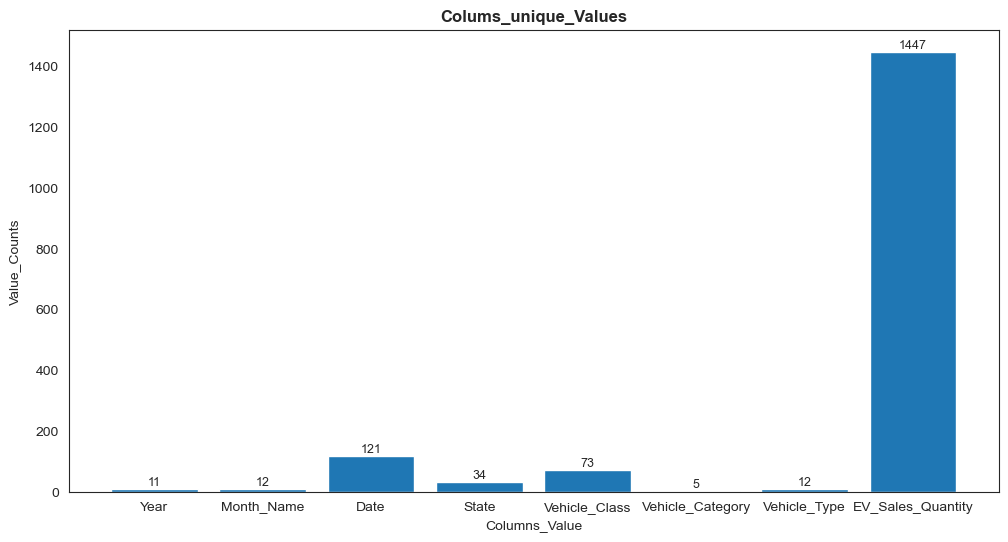

In [41]:
# Bar Graph  for unique Value checking
plt.figure(figsize = (12,6))
sns.set_style("white")
bars = plt.bar(df.columns,unique_columns_counts)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.title("Colums_unique_Values", fontweight = "bold")
plt.xlabel("Columns_Value")
plt.ylabel("Value_Counts")
plt.show()

In [43]:
#Total EV vehicles sold over time
df.EV_Sales_Quantity.sum()

3593811.0

In [44]:
#Total EV vehicles sold year-wise
year_wise_sold = df[["Year","EV_Sales_Quantity"]].groupby(by = "Year").sum()
print(year_wise_sold)

      EV_Sales_Quantity
Year                   
2014             2392.0
2015             7805.0
2016            49855.0
2017            87420.0
2018           130254.0
2019           166819.0
2020           124684.0
2021           331498.0
2022          1024723.0
2023          1525179.0
2024           143182.0


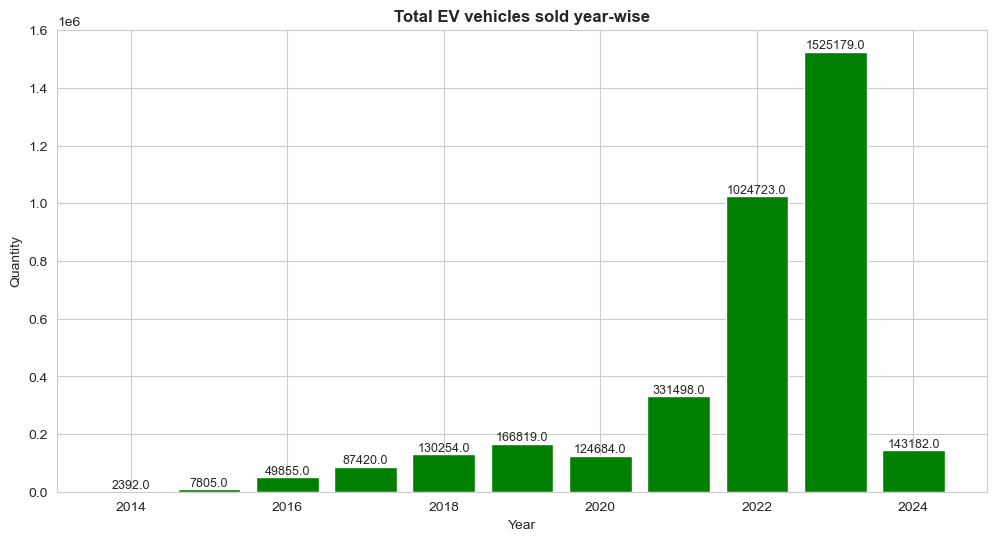

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = plt.bar(year_wise_sold.index,year_wise_sold.EV_Sales_Quantity, color = "green")
plt.title("Total EV vehicles sold year-wise", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Quantity")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.show()

In [49]:
#Total EV vehicles sold month-wise
month_wise_sold = df[["Month_Name", "EV_Sales_Quantity"]].groupby(by="Month_Name", observed=False).sum().sort_values(by="EV_Sales_Quantity", ascending=False)
print(month_wise_sold)

            EV_Sales_Quantity
Month_Name                   
nov                  382217.0
dec                  364558.0
jan                  360703.0
oct                  355083.0
sep                  313433.0
mar                  299888.0
aug                  294022.0
jul                  270473.0
may                  262747.0
apr                  232194.0
jun                  229754.0
feb                  228739.0


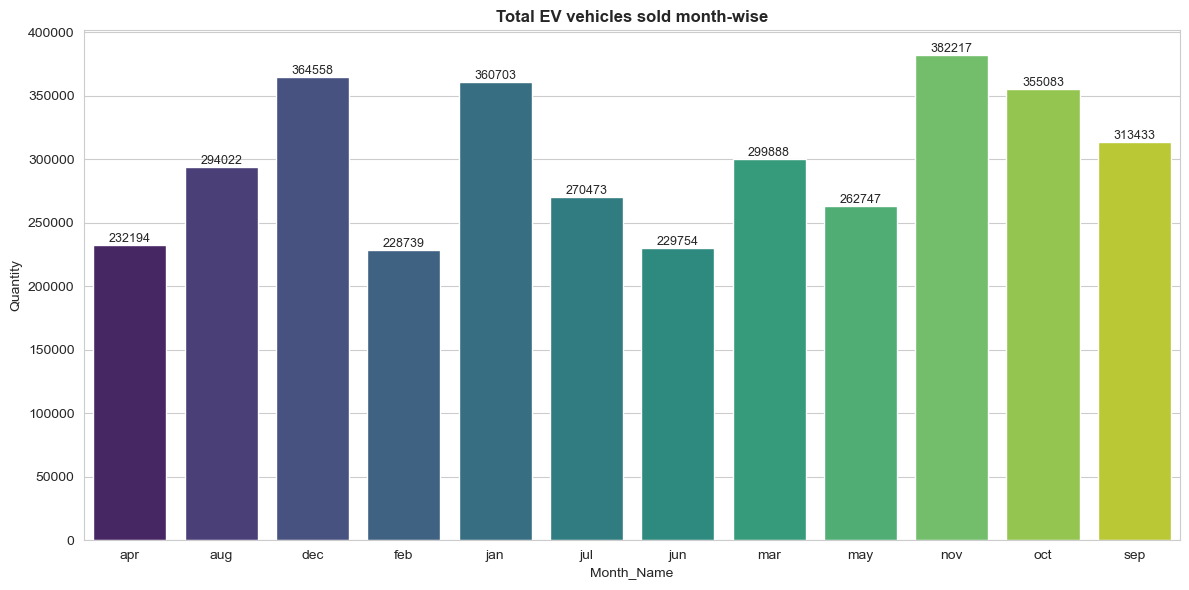

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = sns.barplot(x=month_wise_sold.index, y=month_wise_sold.EV_Sales_Quantity, hue=month_wise_sold.index, data=month_wise_sold, palette="viridis", legend=False)
plt.title("Total EV vehicles sold month-wise", fontweight = 'bold')
plt.xlabel("Month_Name")
plt.ylabel("Quantity")
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.0f}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'EV Sales')

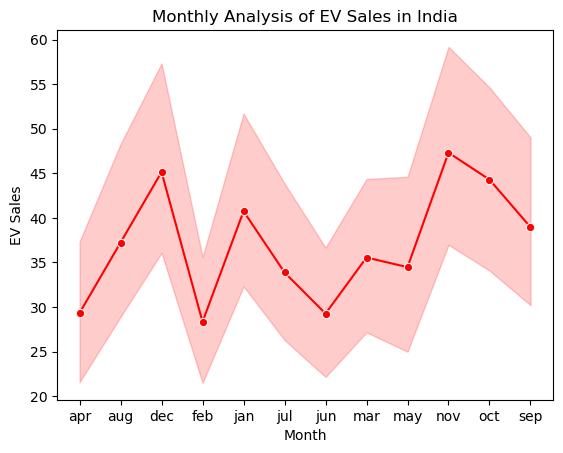

In [25]:
plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df,
marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales')

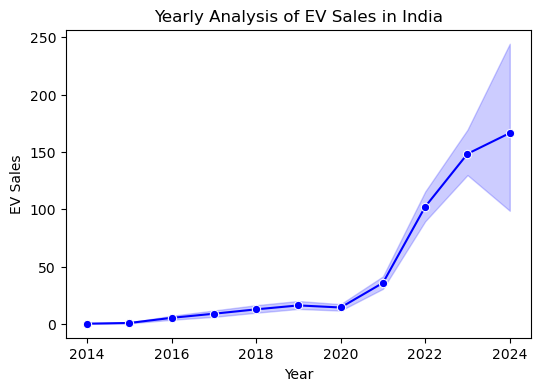

In [26]:
plt.figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df,
marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales');

Text(0, 0.5, 'EV Sales')

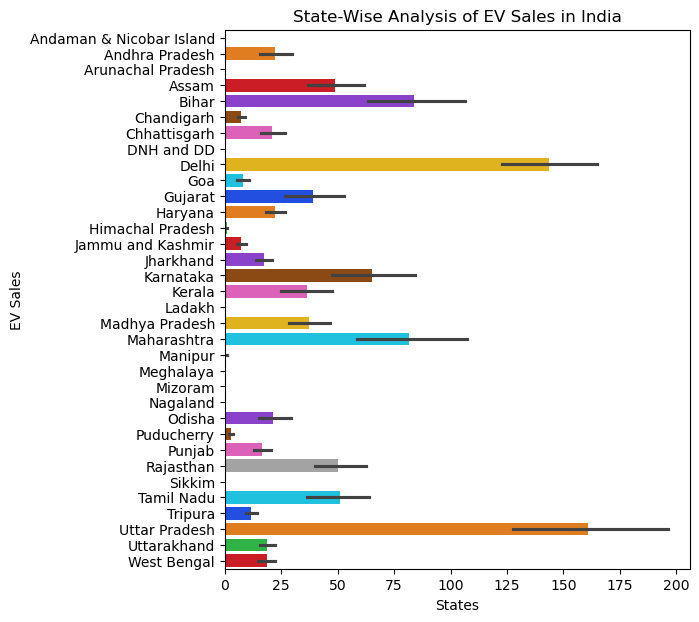

In [27]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales in India')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df,
hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales')

([0, 1, 2, 3, 4],
 [Text(0, 0, '2-Wheelers'),
  Text(1, 0, '3-Wheelers'),
  Text(2, 0, '4-Wheelers'),
  Text(3, 0, 'Bus'),
  Text(4, 0, 'Others')])

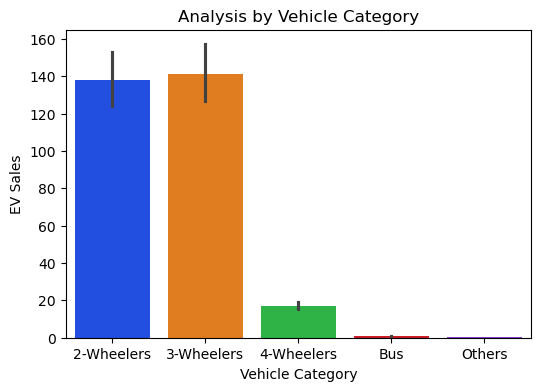

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category',
y='EV_Sales_Quantity',data=df, hue='Vehicle_Category',
palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2W_Personal'),
  Text(1, 0, '2W_Shared'),
  Text(2, 0, '3W_Goods'),
  Text(3, 0, '3W_Goods_LowSpeed'),
  Text(4, 0, '3W_Personal'),
  Text(5, 0, '3W_Shared'),
  Text(6, 0, '3W_Shared_LowSpeed'),
  Text(7, 0, '4W_Personal'),
  Text(8, 0, '4W_Shared'),
  Text(9, 0, 'Bus'),
  Text(10, 0, 'Institution Bus'),
  Text(11, 0, 'Others')])

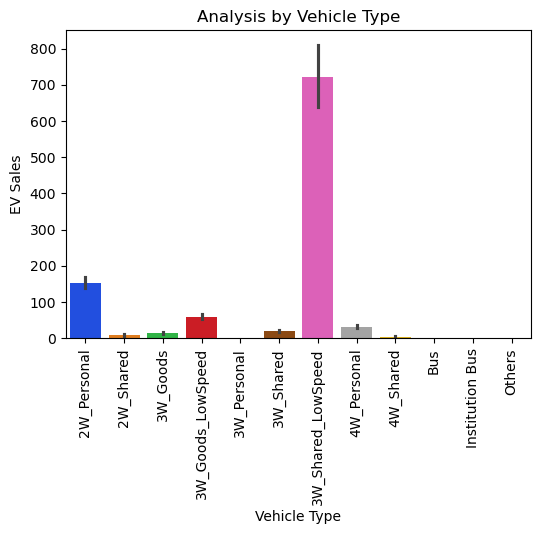

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=df,
hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)

In [62]:
# Extract Month and Day from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [63]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)
print(df_encoded.head())


   Year Month_Name       Date  EV_Sales_Quantity  Month  Day  \
0  2014        jan 2014-01-01                0.0      1    1   
1  2014        jan 2014-01-01                0.0      1    1   
2  2014        jan 2014-01-01                0.0      1    1   
3  2014        jan 2014-01-01                0.0      1    1   
4  2014        jan 2014-01-01                0.0      1    1   

   State_Andhra Pradesh  State_Arunachal Pradesh  State_Assam  State_Bihar  \
0                  True                    False        False        False   
1                  True                    False        False        False   
2                  True                    False        False        False   
3                  True                    False        False        False   
4                  True                    False        False        False   

   ...  Vehicle_Type_3W_Goods  Vehicle_Type_3W_Goods_LowSpeed  \
0  ...                  False                           False   
1  ...          

In [65]:
print("Columns in dataframe:", df.columns)

Columns in dataframe: Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity', 'Month',
       'Day'],
      dtype='object')


In [51]:
#Date wise sale quantity
date_wise_sold = df[["Date","EV_Sales_Quantity"]].groupby("Date").sum()
print(date_wise_sold)

            EV_Sales_Quantity
Date                         
2014-01-01              232.0
2014-02-01              171.0
2014-03-01              220.0
2014-04-01              252.0
2014-05-01              186.0
...                       ...
2023-09-01           127793.0
2023-10-01           139232.0
2023-11-01           152610.0
2023-12-01           141033.0
2024-01-01           143182.0

[121 rows x 1 columns]


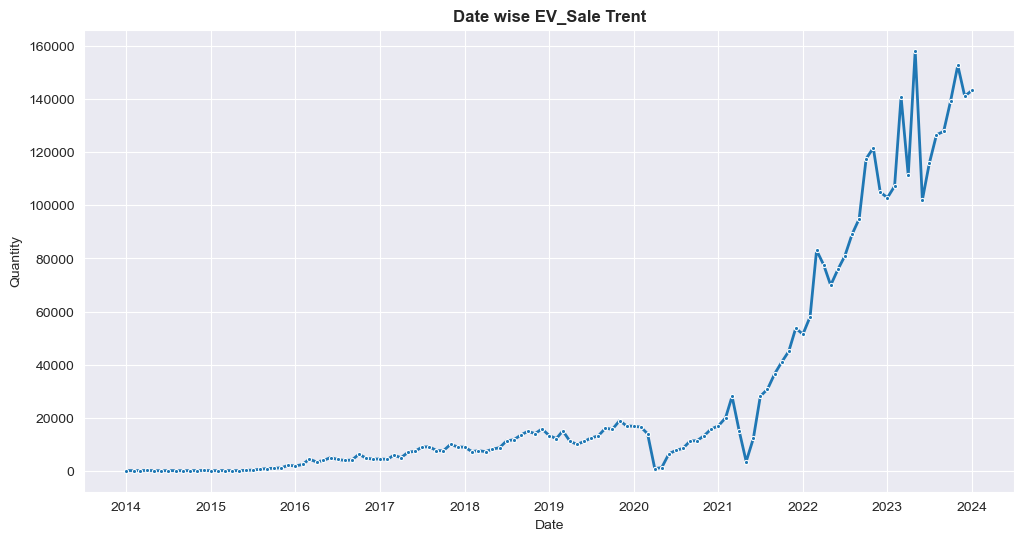

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
sns.lineplot(x = date_wise_sold.index, y = date_wise_sold.EV_Sales_Quantity, data = date_wise_sold, marker = ".", linewidth = 2)
plt.title("Date wise EV_Sale Trent", fontweight = 'bold')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.grid (True)
plt.show()

In [53]:
#State wise sold vechicle quantity
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023,dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023,dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023,dec,2023-12-01,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [55]:
State_wise_sold = df[["State", "EV_Sales_Quantity"]].groupby("State", observed=False).sum().sort_values("EV_Sales_Quantity", ascending=False)
print(State_wise_sold)

                          EV_Sales_Quantity
State                                      
Uttar Pradesh                      732074.0
Maharashtra                        401535.0
Karnataka                          315498.0
Delhi                              268538.0
Rajasthan                          228573.0
Bihar                              213465.0
Tamil Nadu                         206902.0
Gujarat                            176713.0
Assam                              151917.0
Kerala                             133246.0
Madhya Pradesh                     133182.0
Odisha                              86823.0
Haryana                             85250.0
West Bengal                         78112.0
Andhra Pradesh                      77356.0
Chhattisgarh                        75275.0
Uttarakhand                         57606.0
Punjab                              49285.0
Jharkhand                           47871.0
Tripura                             18346.0
Goa                             

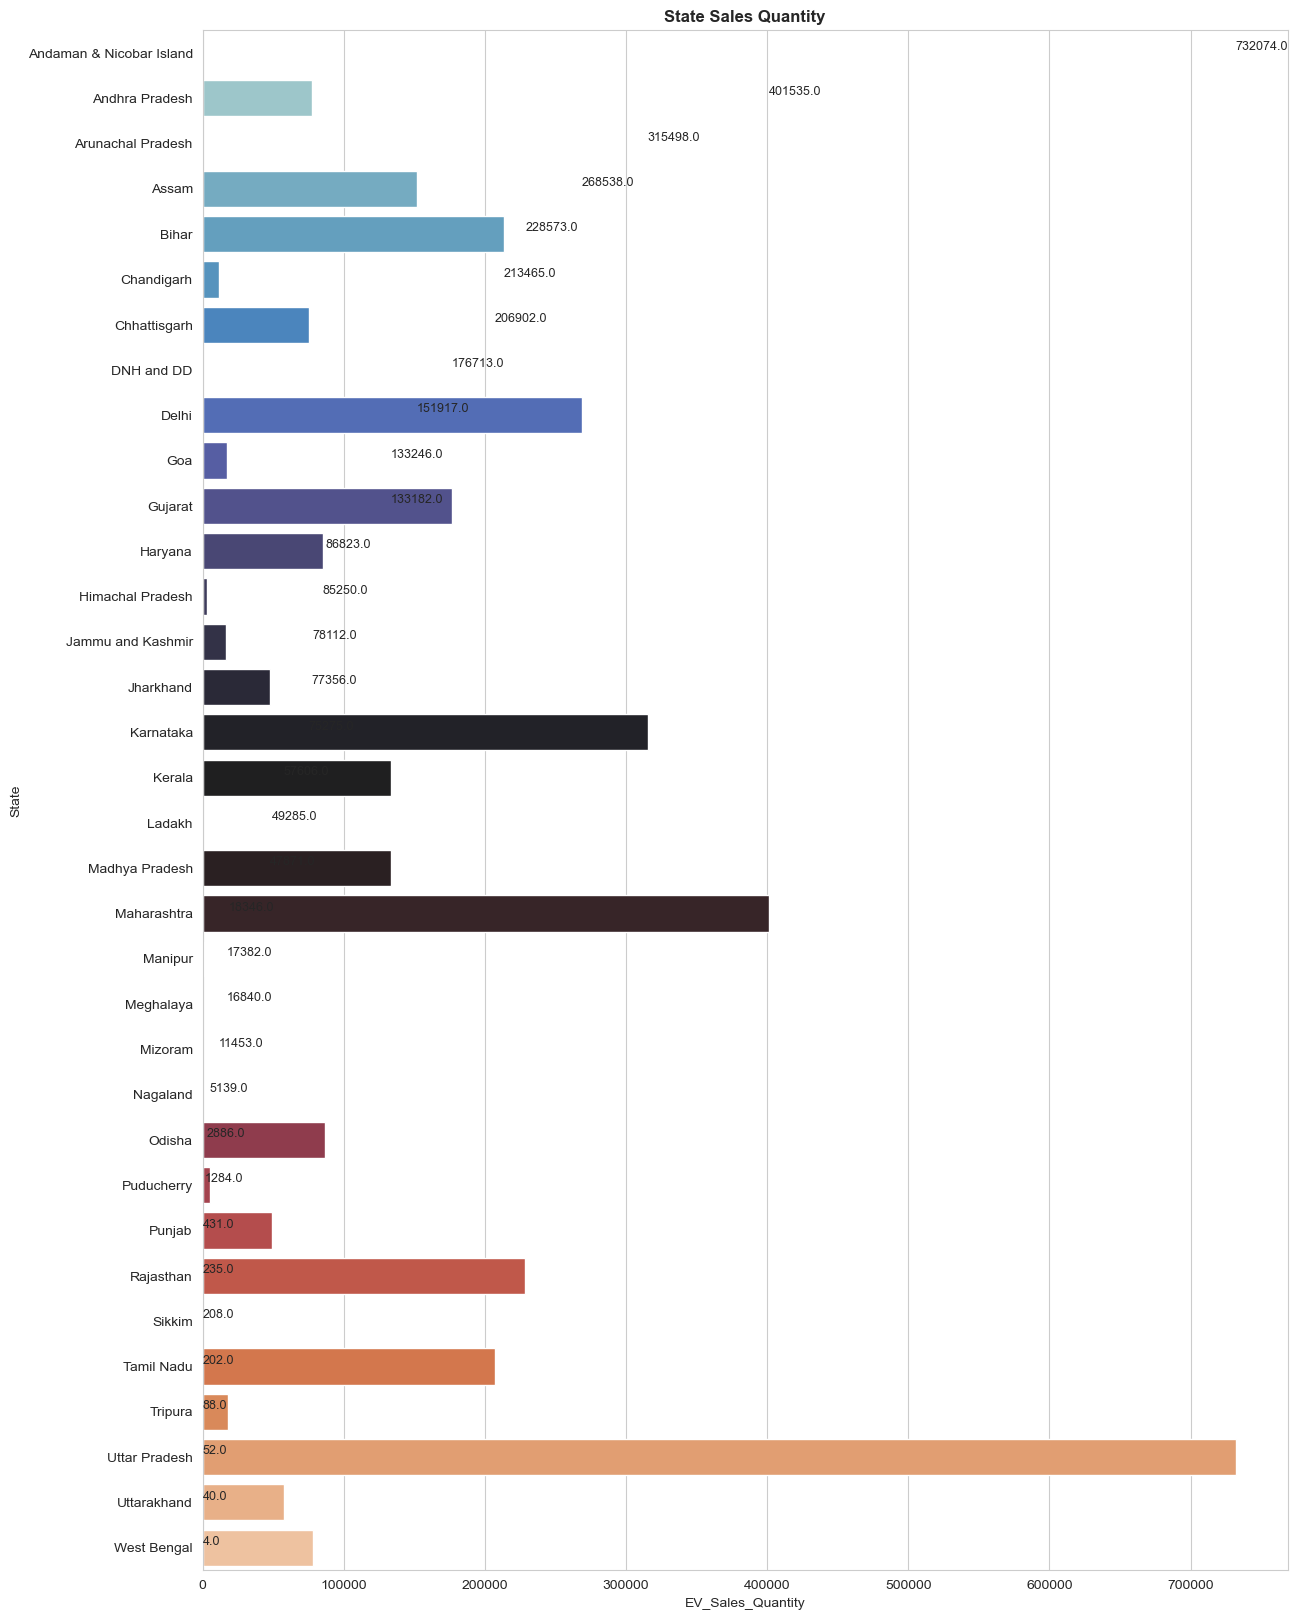

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize = (14,20))
bars = sns.barplot(x=State_wise_sold.EV_Sales_Quantity, y=State_wise_sold.index, data=State_wise_sold, hue=State_wise_sold.index, palette="icefire", orient="h", legend=False),
plt.title("State Sales Quantity", fontweight = "bold")
for index, value in enumerate(State_wise_sold['EV_Sales_Quantity']):
    plt.text(value + 1, index, str(value), va='bottom', fontsize=9)
plt.show()

In [61]:
#Vechicle Class wise sold quantity
Vehicle_Class_wise_sold = df[["Vehicle_Class", "EV_Sales_Quantity"]].groupby("Vehicle_Class", observed=False).sum().sort_values("EV_Sales_Quantity", ascending=False)
print(Vehicle_Class_wise_sold)

                           EV_Sales_Quantity
Vehicle_Class                               
M-CYCLE/SCOOTER                    1697373.0
E-RICKSHAW(P)                      1408127.0
MOTOR CAR                           130676.0
E-RICKSHAW WITH CART (G)             90656.0
THREE WHEELER (PASSENGER)            76132.0
...                                      ...
POWER TILLER                             0.0
HEARSES                                  0.0
LIBRARY VAN                              0.0
MOBILE CANTEEN                           0.0
MOBILE WORKSHOP                          0.0

[73 rows x 1 columns]


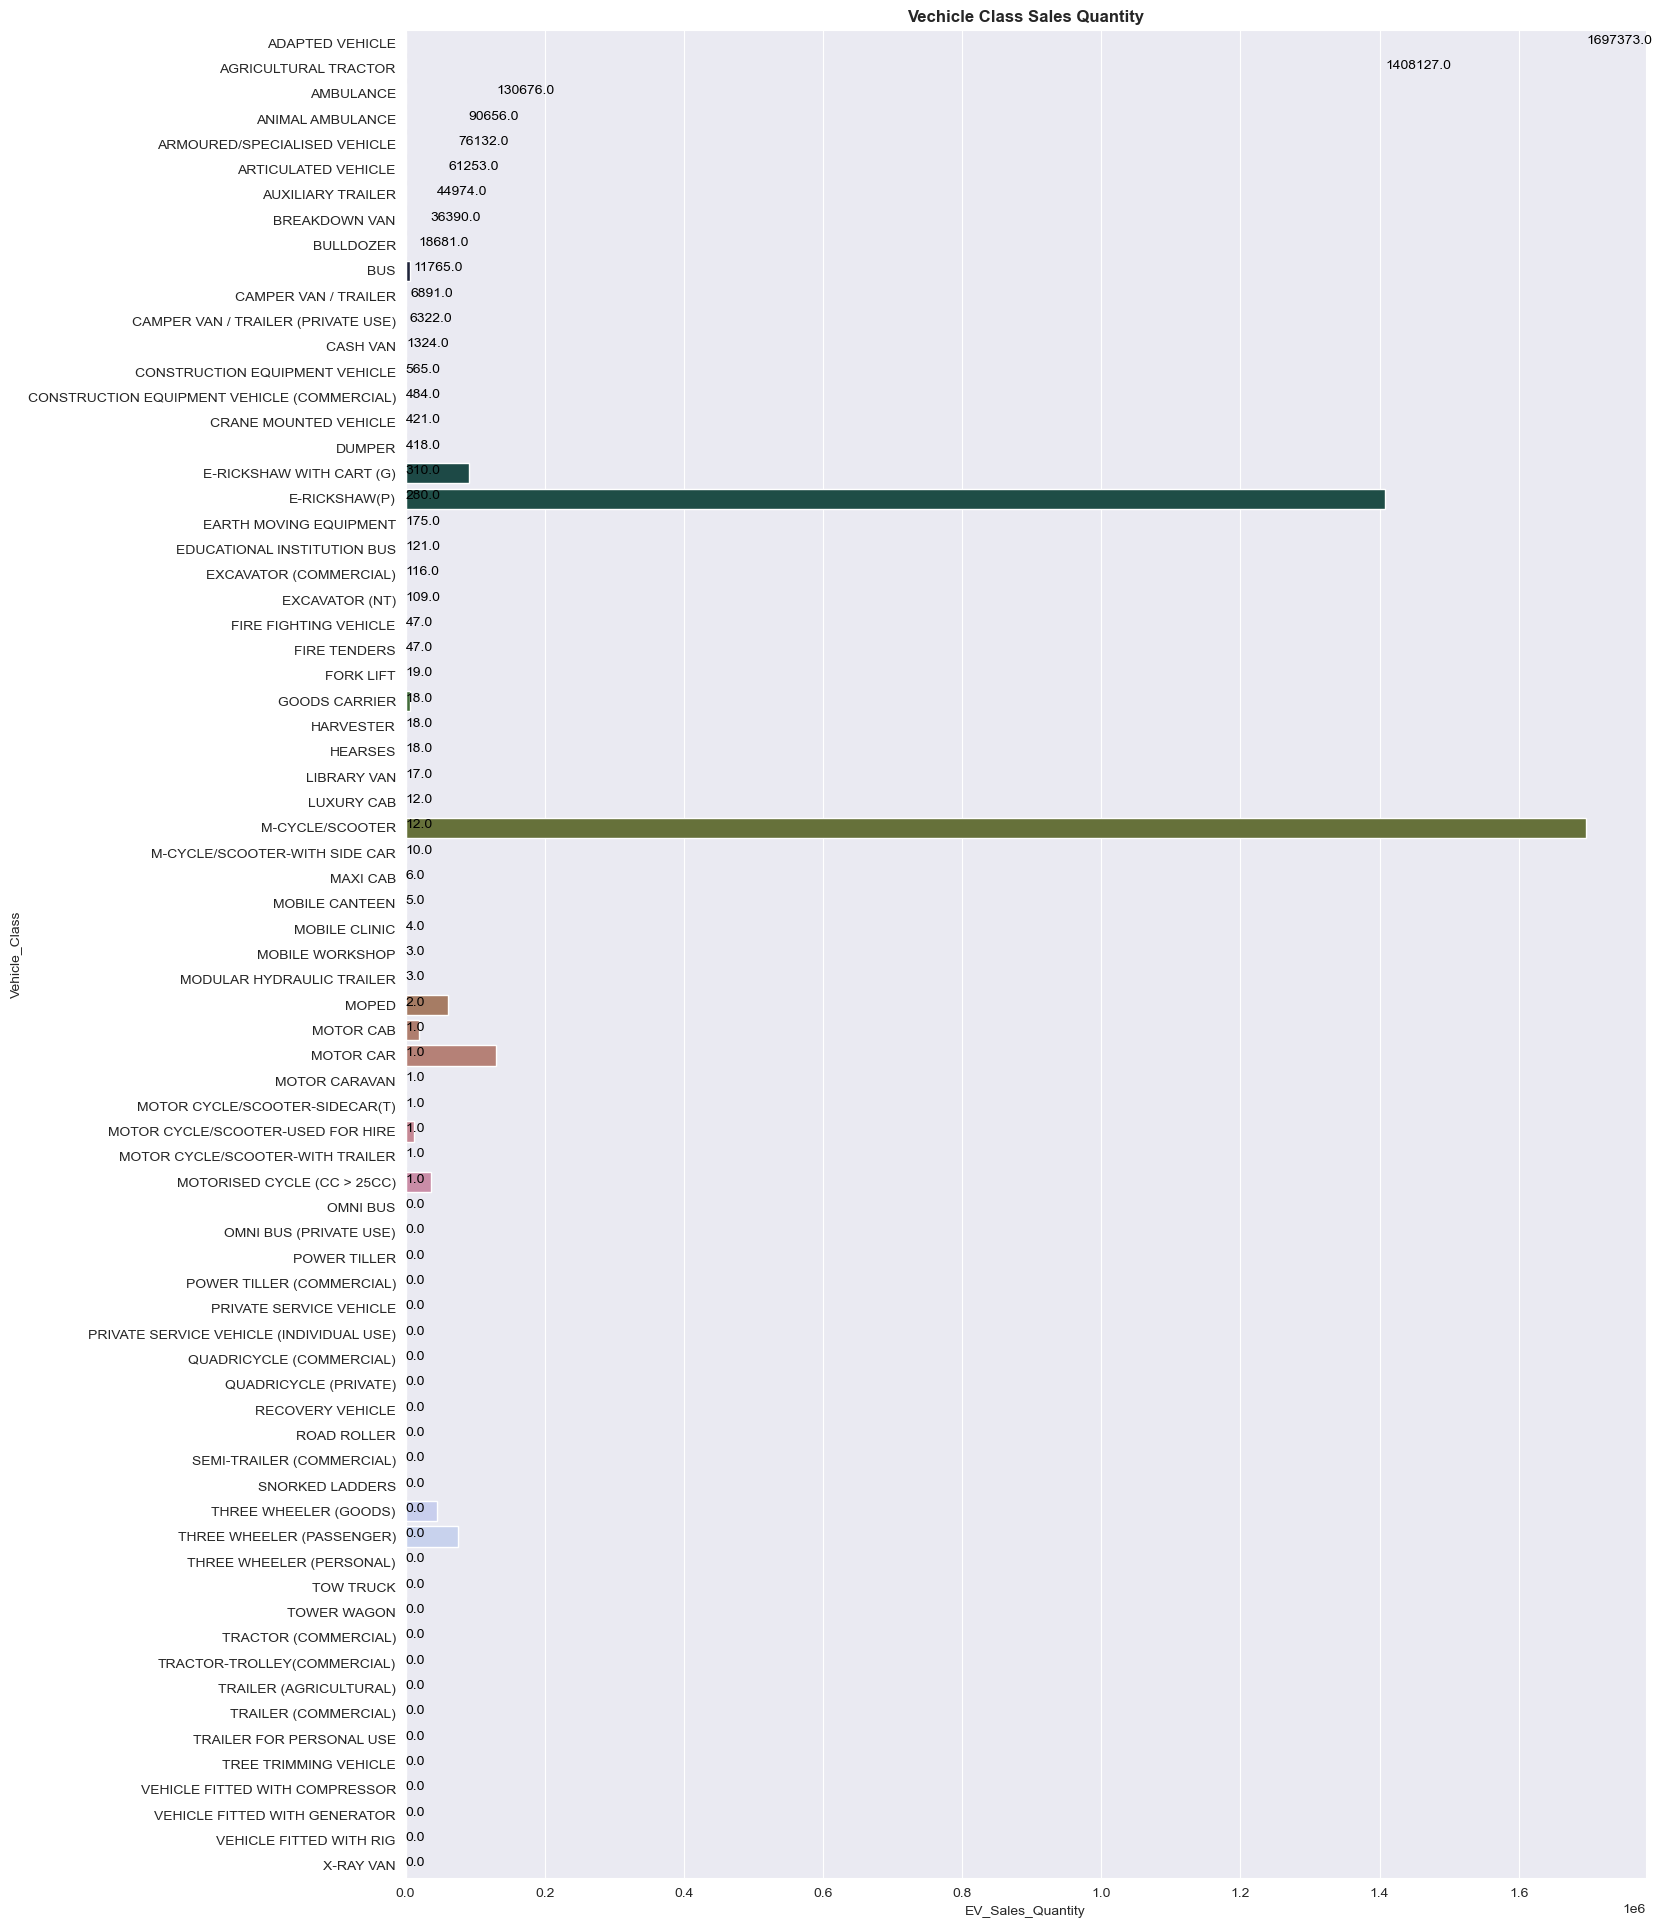

In [152]:
sns.set_style("darkgrid")
plt.figure(figsize = (16,24))
bars = sns.barplot( x = Vehicle_Class_wise_sold.EV_Sales_Quantity  , y = Vehicle_Class_wise_sold.index, hue=Vehicle_Class_wise_sold.index,
             data = Vehicle_Class_wise_sold, orient="h", palette = "cubehelix", legend=False)
plt.title("Vechicle Class Sales Quantity", fontweight = "bold")
for index, value in enumerate(Vehicle_Class_wise_sold['EV_Sales_Quantity']):
    plt.text(value + 1, index - 0.1, str(value), va='center', color='black', fontsize=10)
plt.show()

In [66]:
#Vechicle Category wise sold quantity
Vehicle_Category_wise_sold = df[["Vehicle_Category", "EV_Sales_Quantity"]].groupby("Vehicle_Category", observed=False).sum()
print(Vehicle_Category_wise_sold)

                  EV_Sales_Quantity
Vehicle_Category                   
2-Wheelers                1808105.0
3-Wheelers                1620310.0
4-Wheelers                 149775.0
Bus                          7009.0
Others                       8612.0


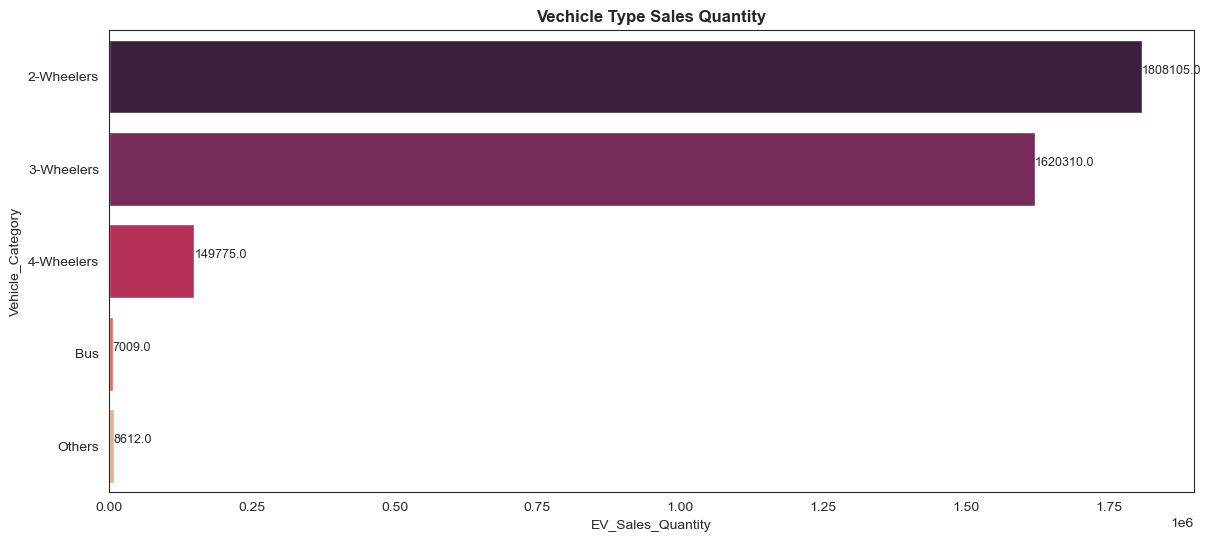

In [68]:
sns.set_style("white")
plt.figure(figsize = (14,6))
bars = sns.barplot( x = Vehicle_Category_wise_sold.EV_Sales_Quantity  , y = Vehicle_Category_wise_sold.index, hue=Vehicle_Category_wise_sold.index,
             data = Vehicle_Category_wise_sold, orient="h", palette = "rocket")
plt.title("Vechicle Type Sales Quantity", fontweight = "bold")
for index, value in enumerate(Vehicle_Category_wise_sold['EV_Sales_Quantity']):
    plt.text(value + 1, index, str(value), va='bottom', fontsize=9)

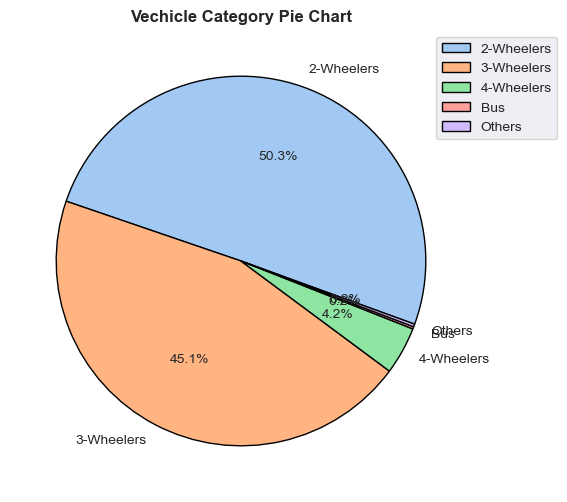

In [70]:
plt.figure(figsize = (6,6))
colors = sns.color_palette("pastel")
plt.pie(Vehicle_Category_wise_sold.EV_Sales_Quantity, labels=Vehicle_Category_wise_sold.index,
        autopct='%1.1f%%', colors = colors , startangle = -20, wedgeprops={'edgecolor': 'black'})
plt.title("Vechicle Category Pie Chart", fontweight = "bold")
plt.legend(Vehicle_Category_wise_sold.index, loc="upper right", bbox_to_anchor=(1.2, 1))


# Feature Engineering

In [110]:
# Extract Month and Day from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [111]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State',
'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],
drop_first=True)

In [113]:
# Drop unnecessary columns like Date, Month_Name (if already extracted into numerical values)
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

# Modeling

In [123]:
# Split the data into features and target variable
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

In [124]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [125]:
# Instantiate the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)

In [126]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [127]:
# Make predictions
y_pred = model.predict(X_test)

In [128]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


# Model Evaluation

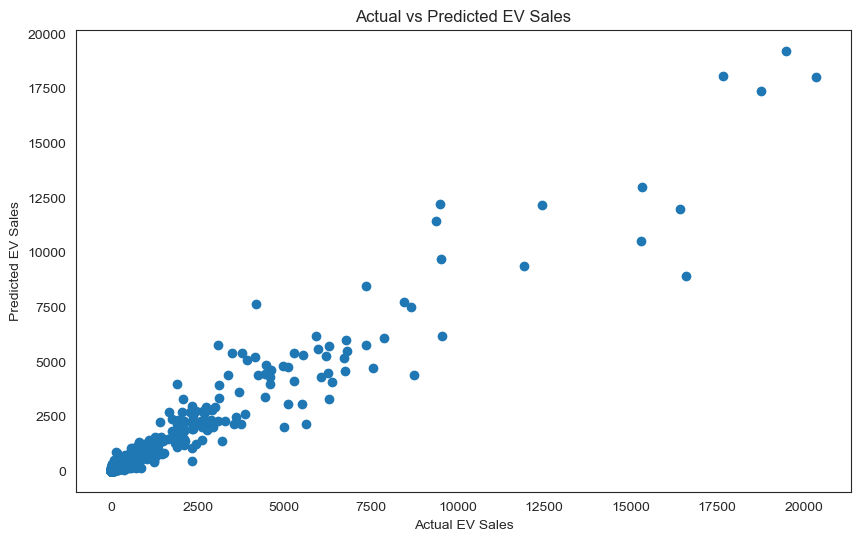

In [129]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

In [130]:
# Check feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)

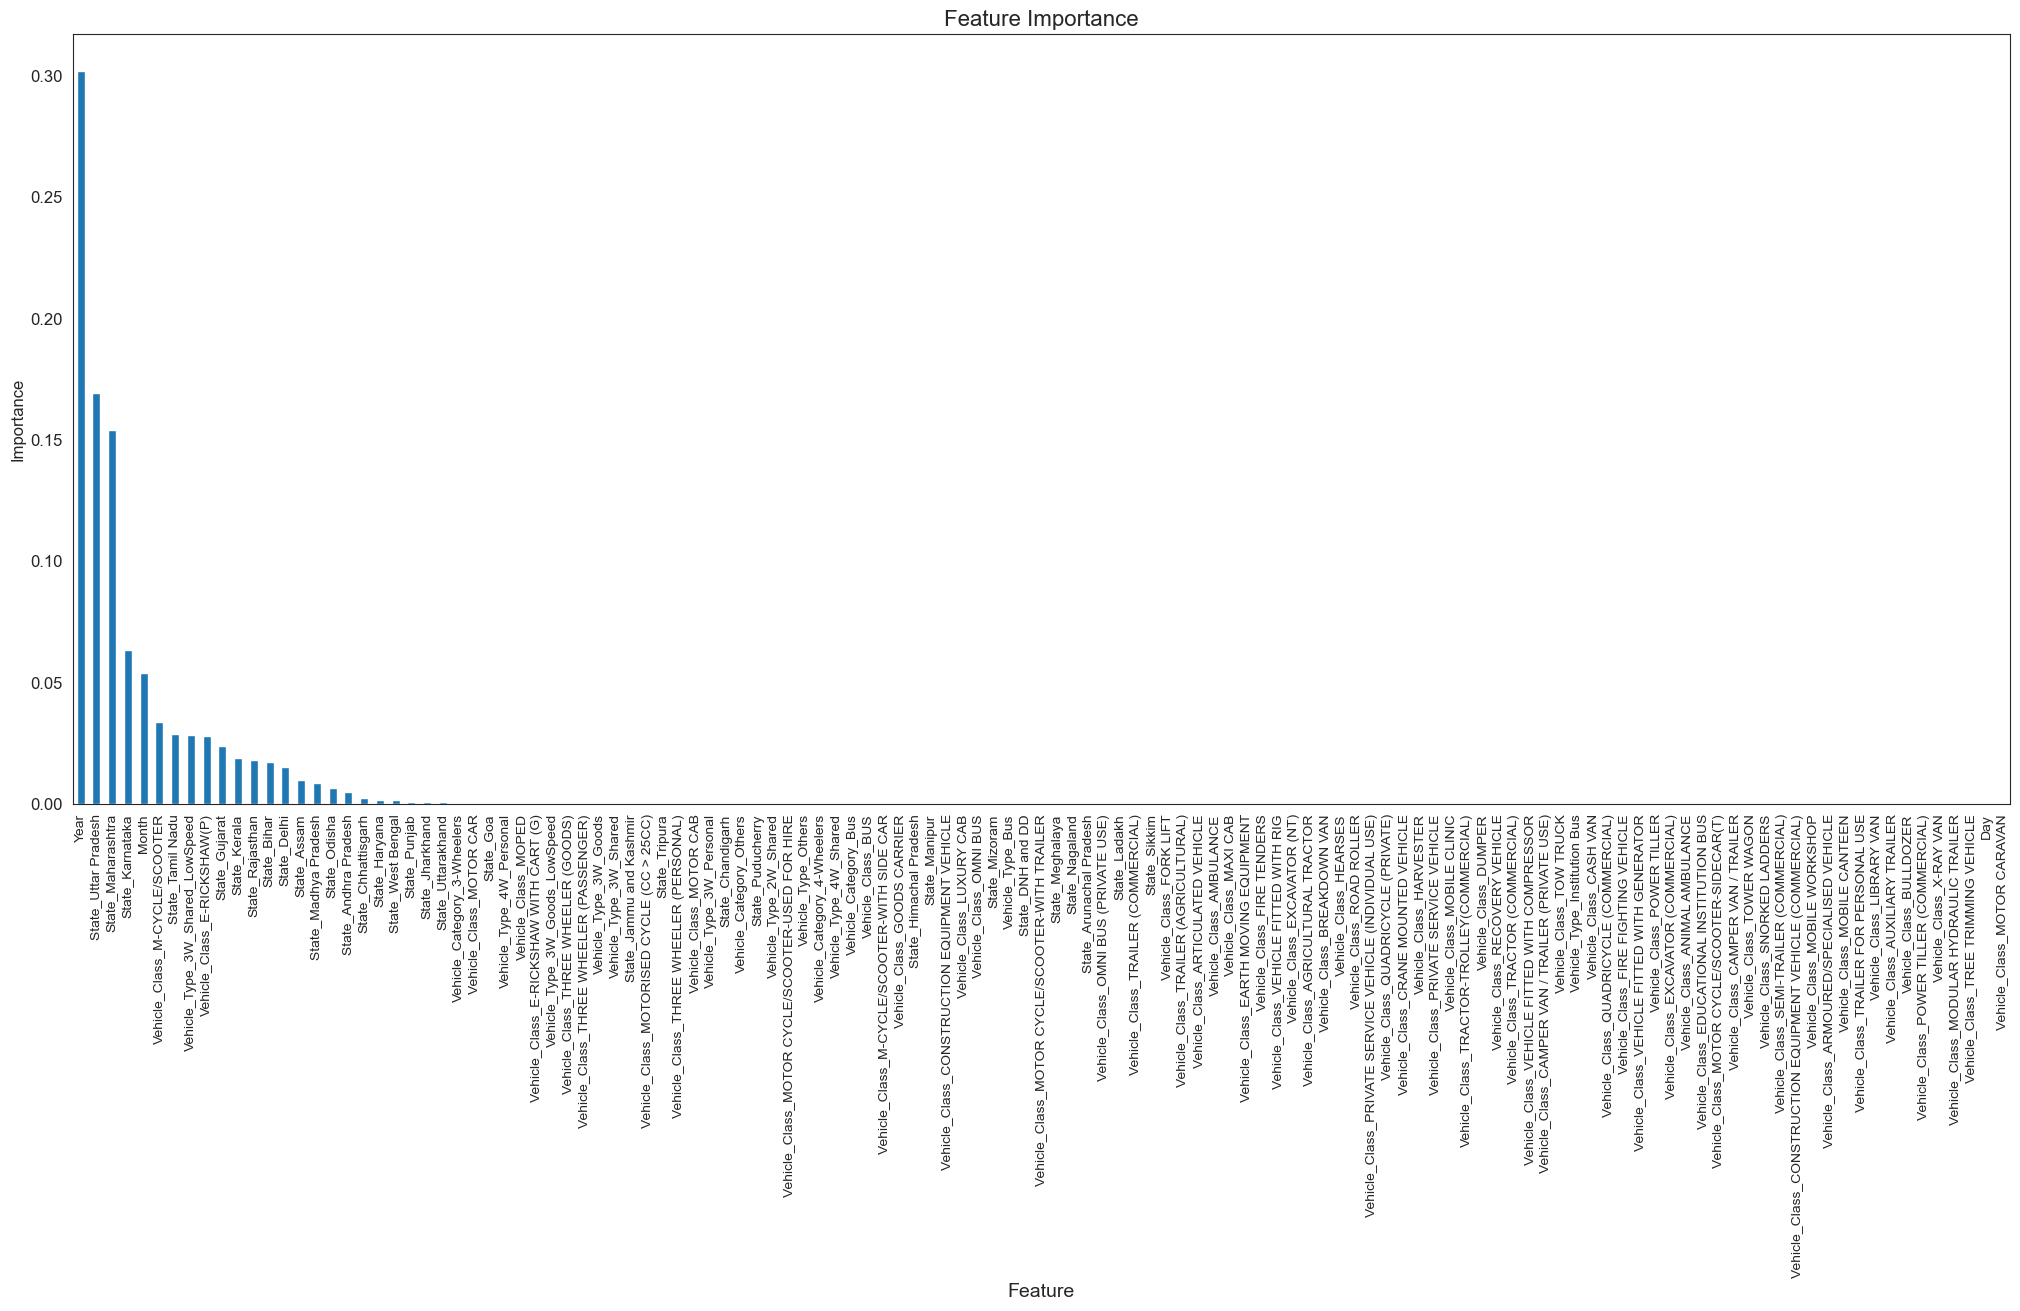

In [131]:
# Plot the most important features
plt.figure(figsize=(25, 10))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Mean Absolute Error: 10.730402189065002
Mean Squared Error: 17051.59402778667
Root Mean Squared Error: 130.58175227721011
R-squared: 0.934519365497295


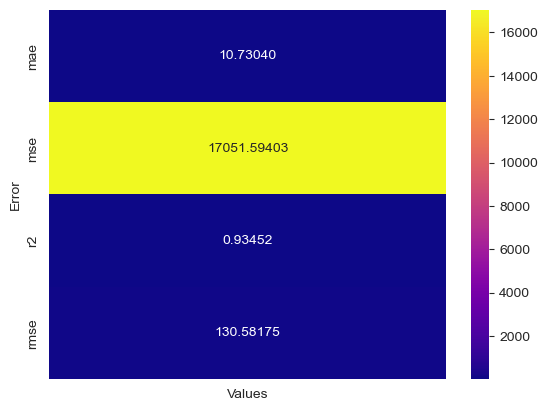

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate errors
mae = float(mean_absolute_error(y_test, y_pred))
mse = float(mean_squared_error(y_test, y_pred))
rmse = float(np.sqrt(mse))
r2 = float((r2_score(y_test, y_pred)))

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

df = pd.DataFrame ({"Error" : ["mae", "mse", "rmse", "r2"],"Values" : [mae, mse, rmse, r2]})
sns.heatmap(df.pivot_table(index = "Error", values = "Values"),cmap = "plasma", annot = True, fmt=".5f" )
plt.show()

1️⃣ Mean Absolute Error (MAE)
Measures the average absolute difference between actual (y_test) and predicted (y_pred) values. Lower MAE means better predictions. It gives equal weight to all errors, making it easy to interpret. ✅ Example: If MAE = 5, on average, your model’s prediction is off by 5 units.

2️⃣ Mean Squared Error (MSE)
Measures the average squared differences between actual and predicted values. Squaring penalizes larger errors more than smaller ones. Lower MSE means a better model, but its scale is different from the original data. ✅ Example: If MSE = 25, it means the squared error is 25 on average.

3️⃣ Root Mean Squared Error (RMSE)
he square root of MSE to bring the error back to the same scale as the data. More sensitive to large errors than MAE. Lower RMSE means better predictions. ✅ Example: If RMSE = 5, the typical prediction error is 5 units.

4️⃣ R-Squared (R² Score)
Measures how well the model explains the variance in the data. Ranges from 0 to 1 (sometimes negative if the model is very bad). R² = 1 → Perfect fit R² = 0 → Model explains nothing Negative R² → Model performs worse than a simple mean ✅ Example: If R² = 0.85, it means 85% of the variance in y_test is explained by the model.

Metric Interpretation
MAE - Average absolute error (lower is better) MSE - Average squared error (penalizes large errors) RMSE - Standardized error (same unit as data) R² Score - How well the model explains the variance (closer to 1 is better)

# Forecasting

In [140]:
# Create a new DataFrame with Year and EV_Sales_Quantity columns, grouped by Year and summed up
forecast_df = df[["Year", "EV_Sales_Quantity"]].groupby("Year").sum().reset_index()

# Convert the Year column to datetime format
forecast_df.Year = pd.to_datetime(forecast_df.Year, format="%Y")

# Rename the columns for compatibility with forecasting libraries
forecast_df = forecast_df.rename(columns={"Year": "ds", "EV_Sales_Quantity": "y"})

# Display the DataFrame
print(forecast_df)


           ds          y
0  2014-01-01     2392.0
1  2015-01-01     7805.0
2  2016-01-01    49855.0
3  2017-01-01    87420.0
4  2018-01-01   130254.0
5  2019-01-01   166819.0
6  2020-01-01   124684.0
7  2021-01-01   331498.0
8  2022-01-01  1024723.0
9  2023-01-01  1525179.0
10 2024-01-01   143182.0


In [145]:
from prophet import Prophet # Import the Prophet model

# Initialize the Prophet model
model = Prophet()

# Fit the model on the data
model.fit(forecast_df)

# Create a DataFrame for future 5 years
future = model.make_future_dataframe(periods=5, freq='YE')

# Predict future values
forecast = model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

18:41:32 - cmdstanpy - INFO - Chain [1] start processing
18:41:32 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,-1.043055e+05,-533740.256740,3.180177e+05
1,2015-01-01,-8.187621e+04,-504686.844470,3.457927e+05
2,2016-01-01,-6.714059e+04,-543174.954462,3.619869e+05
3,2017-01-01,2.504376e+05,-165522.586587,6.973228e+05
4,2018-01-01,2.806499e+05,-178106.310463,7.196754e+05
5,2019-01-01,3.030792e+05,-136881.569359,7.554929e+05
6,2020-01-01,3.178148e+05,-128385.050768,7.644645e+05
7,2021-01-01,6.353930e+05,188846.943371,1.068096e+06
8,2022-01-01,6.656054e+05,233729.150726,1.152550e+06
9,2023-01-01,6.880346e+05,213597.302178,1.168899e+06


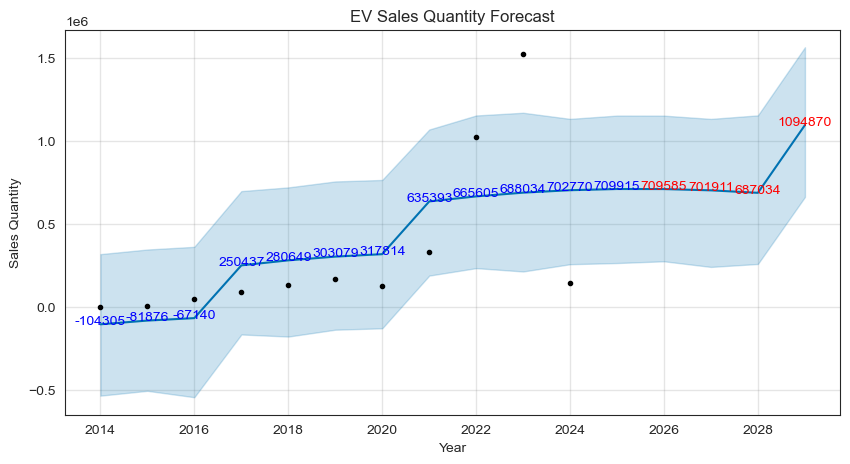

In [146]:
fig, ax = plt.subplots(figsize=(10, 5))
model.plot(forecast, ax=ax)

# Annotate actual and predicted values
for i, row in forecast.iterrows():
    if row['ds'].year in forecast_df["ds"].dt.year.values:
        color = "blue"  # Actual data points
    else:
        color = "red"   # Predicted values
    ax.text(row['ds'], row['yhat'], f"{int(row['yhat'])}", color=color, fontsize=10, ha='center')


plt.title('EV Sales Quantity Forecast')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.show()

In [147]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,-3.695188e+05,-533740.256740,3.180177e+05,-3.695188e+05,-3.695188e+05,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,0.0,0.0,0.0,-1.043055e+05
1,2015-01-01,-2.733459e+05,-504686.844470,3.457927e+05,-2.733459e+05,-2.733459e+05,191469.651551,191469.651551,191469.651551,191469.651551,191469.651551,191469.651551,0.0,0.0,0.0,-8.187621e+04
2,2016-01-01,-1.771729e+05,-543174.954462,3.619869e+05,-1.771729e+05,-1.771729e+05,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,0.0,0.0,0.0,-6.714059e+04
3,2017-01-01,-8.073641e+04,-165522.586587,6.973228e+05,-8.073641e+04,-8.073641e+04,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,0.0,0.0,0.0,2.504376e+05
4,2018-01-01,1.543657e+04,-178106.310463,7.196754e+05,1.543657e+04,1.543657e+04,265213.376310,265213.376310,265213.376310,265213.376310,265213.376310,265213.376310,0.0,0.0,0.0,2.806499e+05
5,2019-01-01,1.116095e+05,-136881.569359,7.554929e+05,1.116095e+05,1.116095e+05,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,0.0,0.0,0.0,3.030792e+05
6,2020-01-01,2.077825e+05,-128385.050768,7.644645e+05,2.077825e+05,2.077825e+05,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,0.0,0.0,0.0,3.178148e+05
7,2021-01-01,3.042190e+05,188846.943371,1.068096e+06,3.042190e+05,3.042190e+05,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,0.0,0.0,0.0,6.353930e+05
8,2022-01-01,4.003920e+05,233729.150726,1.152550e+06,4.003920e+05,4.003920e+05,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,0.0,0.0,0.0,6.656054e+05
9,2023-01-01,4.965650e+05,213597.302178,1.168899e+06,4.965650e+05,4.965650e+05,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,0.0,0.0,0.0,6.880346e+05


Understanding the Forecast Output

ds: The forecasted date (year).

yhat: The predicted sales quantity.

yhat_lower and yhat_upper: The lower and upper bounds of the confidence interval.







Residual Analysis
yhat (Predicted Sales): These are the forecasted EV sales for each year. y (Actual Sales): The real EV sales data from historical records.

Residual Calculation: Residual = Predicted Sales − Actual Sales Residual=Predicted Sales−Actual Sales

If residuals are close to zero, the model is accurate. Large positive residuals indicate overprediction (forecast is too high). Large negative residuals indicate underprediction (forecast is too low).

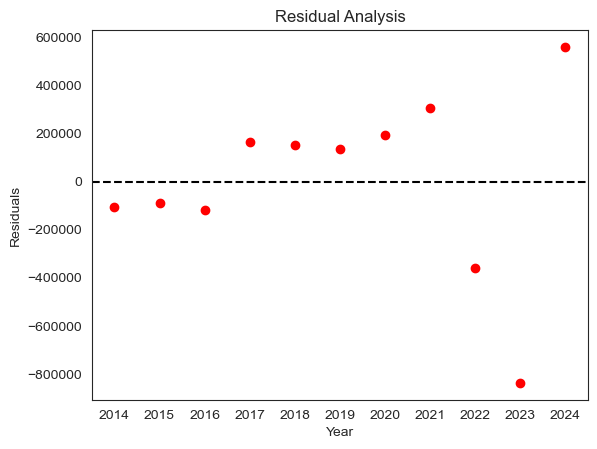

In [148]:
forecast['residuals'] = forecast['yhat'] - forecast_df['y']
plt.scatter(forecast['ds'], forecast['residuals'], color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()